In [1]:
import pandas as pd 
import numpy as np 

X = pd.read_csv('../Boosts/Datasets/X.csv')
y = pd.read_csv('../Boosts/Datasets/y.csv')

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [3]:
class_weight = {0:2, 1:3}

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(bootstrap=False, criterion='entropy',
                                  max_depth=None, max_features=9,
                                  min_samples_leaf=3, min_samples_split=4,
                                  class_weight=class_weight)
rf_model.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=False, class_weight={0: 2, 1: 3},
                       criterion='entropy', max_features=9, min_samples_leaf=3,
                       min_samples_split=4)

In [5]:
y_pred = rf_model.predict(X_test)

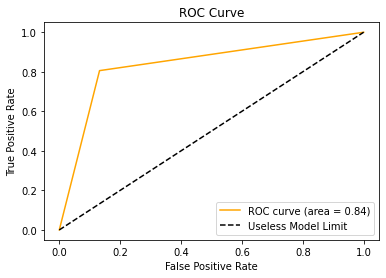

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt 

%matplotlib inline

fpr, tpr, thresholds = roc_curve(np.ravel(y_test), y_pred)
auc = roc_auc_score(np.ravel(y_test), y_pred)

plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [7]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.876583,0.793117,0.843833,0.834850,0.844349
recall,0.867748,0.805821,0.843833,0.836785,0.843833
f1-score,0.872143,0.799419,0.843833,0.835781,0.844057
support,8136.000000,5119.000000,0.843833,13255.000000,13255.000000


In [9]:
import joblib

# save the model
joblib.dump(rf_model, "../Boosts/SavedModels/Random_Forest.joblib", compress=('gzip',9))

#load the model
# loaded_rf = joblib.load("./random_forest.joblib")

['../Boosts/SavedModels/Random_Forest.joblib']